<a href="https://colab.research.google.com/github/rinkeshdas01/Hotel_Booking_Analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Hotel Bookings.csv"

In [4]:
df=pd.read_csv(path)

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [8]:
df.shape

(119390, 32)

In [9]:
df.describe

<bound method NDFrame.describe of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27

DATA CLEANING

In [10]:
df.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
#We will remove the data that is not necessary for our analysis
df=df.drop(['company','agent'],axis=1)



In [13]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [14]:
#replacing the null values for various columns
#We replace null values in children column by mean of all the values
df['children'].fillna(df['children'].mean(),inplace=True)
#We replace null values in country column by 'Absent'
df['country'].fillna('Absent',inplace=True)

In [15]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [16]:
#Now we try to gather information regarding all the columns of our interest. For this we create a test dataframe.
df1=df.copy()

In [17]:
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [18]:
df1['is_canceled'].unique()

array([0, 1])

In [19]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [20]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [22]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [23]:
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [24]:
df1['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'Absent', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA

**EXPLORATORY DATA ANALYSIS**

([<matplotlib.patches.Wedge at 0x7f4559154650>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(0.9998895939895392, 0.5680852047285114, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.5651549879071308, 0.32109163745524555, '33.6%')])

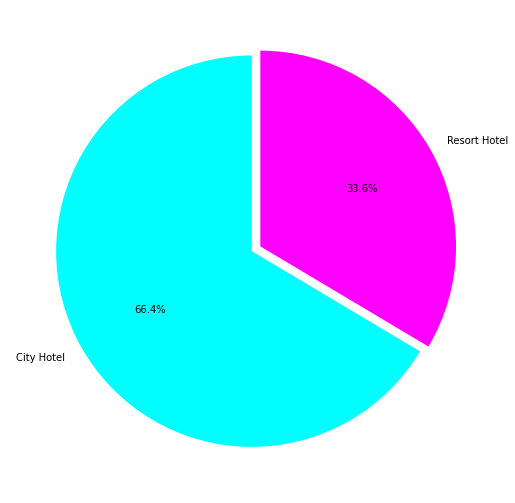

In [25]:
#Percentage of booking in each hotel
#Fixing the size of the pie chart
plt.rcParams['figure.figsize']=9,9
#Converting labels and values into list form
labels=df['hotel'].value_counts().index.tolist()
values=df['hotel'].value_counts().tolist()
#Choosing colors for the piechart
colors=['cyan','magenta']
#choosing spacing between the sections of the piechart
explode=(0,0.05)
plt.pie(values,labels=labels,explode=explode,colors=colors,autopct='%1.1f%%',startangle=90)


**The above analysis shows that about 66% of the bookings were made in City Hotel and around 33% were made in Resort Hotel. This may be due to the fact that Resort hotel is expensive as compared to City Hotel. So people generally tend to stay at City Hotel. This analysis will be clearer when the number of people staying in the hotels is taken into account.**

In [26]:
#We try to find the average number of kids and average number of total family members staying in each hotel.
df['kids']=df['babies']+df['children']
df['family_members']=df['kids']+df['adults']

In [27]:
df.groupby(['hotel'])['family_members'].mean()

hotel
City Hotel      1.947289
Resort Hotel    2.009735
Name: family_members, dtype: float64

In [28]:
df.groupby(['hotel'])['kids'].mean()

hotel
City Hotel      0.096312
Resort Hotel    0.142586
Name: kids, dtype: float64

In [29]:
df2=df.groupby(['hotel'],as_index=False)['kids'].mean()
df2.columns=['hotel','avg no. of kids']

In [30]:
df2

,hotel,avg no. of kids
0,City Hotel,0.096312
1,Resort Hotel,0.142586


In [31]:
df3=df.groupby(['hotel'],as_index=False)['family_members'].mean()
df3.columns=['hotel','avg no. of family members']

In [32]:
df3

,hotel,avg no. of family members
0,City Hotel,1.947289
1,Resort Hotel,2.009735


Text(0.5, 1.0, 'Average no. of kids per booking')

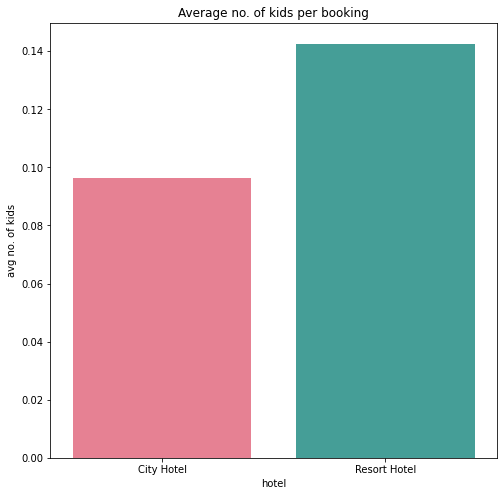

In [33]:

plt.rcParams['figure.figsize']=8,8

sns.barplot(x='hotel',y='avg no. of kids', data=df2, palette='husl')
plt.title('Average no. of kids per booking')


Text(0.5, 1.0, 'Average number of family members per booking')

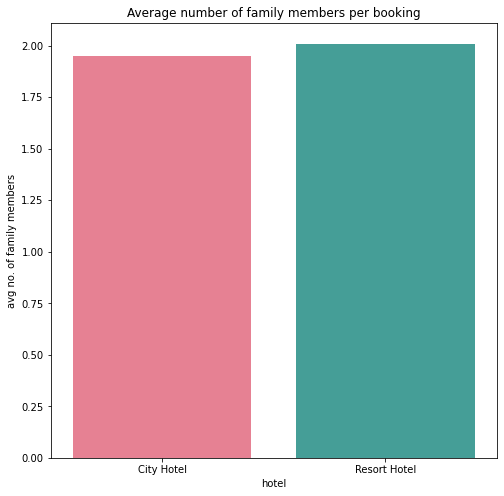

In [34]:
plt.rcParams['figure.figsize']=8,8
sns.barplot(x='hotel',y='avg no. of family members', data= df3, palette='husl')
plt.title('Average number of family members per booking')

**It is clear that the mean values for number of family mambers and number of children are more for Resort Hotel. From the above analysis we conclude that people with large families prefer Resort Hotel.**

In [35]:
df4=df.groupby(['hotel'],as_index=False).agg({'is_canceled':['sum','count']})
df4.columns=['hotel','cancelled','total_booking']
df4['not_cancelled']=df4['total_booking']-df4['cancelled']
df4=df4.drop(['total_booking'],axis=1)
df4




,hotel,cancelled,not_cancelled
0,City Hotel,33102,46228
1,Resort Hotel,11122,28938


In [36]:
#CITY HOTEL
df5=df4.iloc[:1]

df5=df5.drop(['hotel'],axis=1)
df5=df5.T
df5

,0
cancelled,33102
not_cancelled,46228


In [37]:
#RESORT HOTEL
df6=df4.iloc[1:]
df6=df6.drop(['hotel'],axis=1)
df6=df6.T
df6

,1
cancelled,11122
not_cancelled,28938


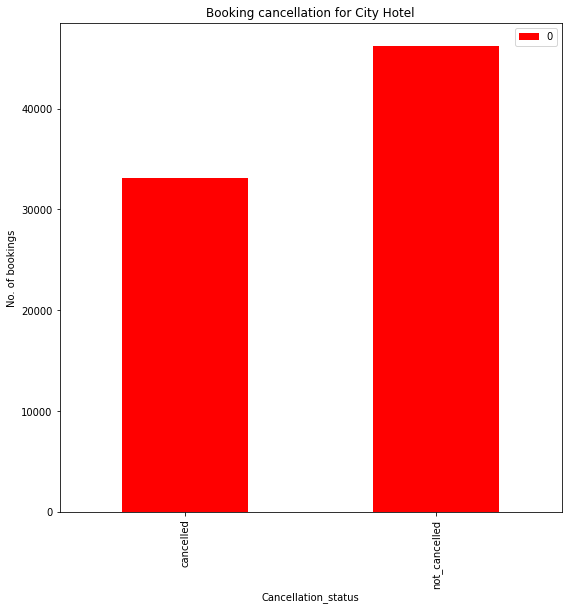

In [38]:
plt.rcParams['figure.figsize']=9,9
df5.plot(kind='bar',color='r')
plt.title('Booking cancellation for City Hotel')
plt.xlabel('Cancellation_status')
plt.ylabel('No. of bookings')

plt.show()

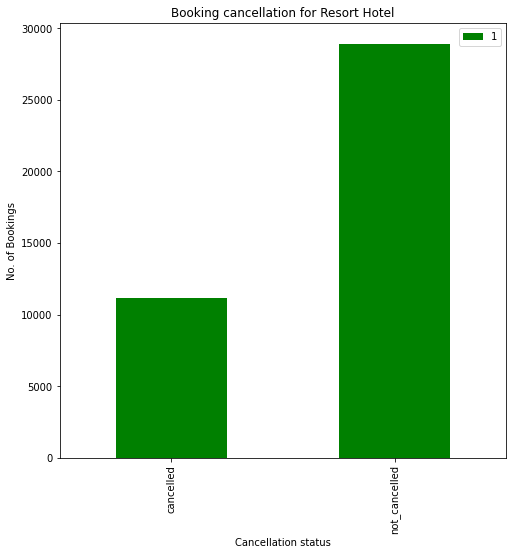

In [39]:
plt.rcParams['figure.figsize']=8,8
df6.plot(kind='bar',color='green')
plt.title('Booking cancellation for Resort Hotel')
plt.xlabel('Cancellation status')
plt.ylabel('No. of Bookings')
plt.show()

In [40]:
#Estimate % of cancellation of bookings in hotels
new_df=df.groupby(['hotel'],as_index=False).agg({'is_canceled':['sum','count']})
new_df.columns=['hotel','cancelled','total bookings']
new_df['cancellation%']=(new_df['cancelled']/new_df['total bookings'])*100
new_df=new_df.drop(['cancelled','total bookings'],axis=1)
new_df

,hotel,cancellation%
0,City Hotel,41.726963
1,Resort Hotel,27.763355


Text(0, 0.5, 'Cancellation %')

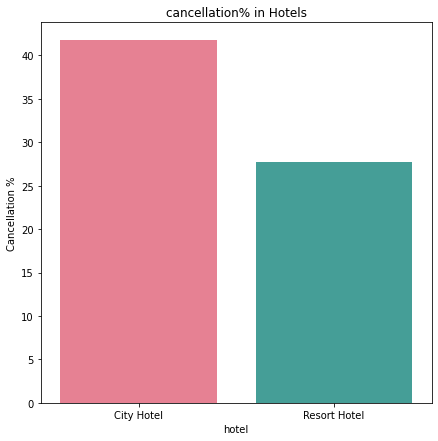

In [41]:
#plot graph of % of cancellation
plt.rcParams['figure.figsize']=7,7
sns.barplot(x='hotel',y='cancellation%', palette='husl',data=new_df)
plt.title('cancellation% in Hotels')
plt.ylabel('Cancellation %')

In [42]:
#No. of bookings per year
df7=df.groupby(['arrival_date_year','hotel'])['hotel'].count()

df7

arrival_date_year  hotel       
2015               City Hotel      13682
                   Resort Hotel     8314
2016               City Hotel      38140
                   Resort Hotel    18567
2017               City Hotel      27508
                   Resort Hotel    13179
Name: hotel, dtype: int64

Text(0, 0.5, 'No. of bookings')

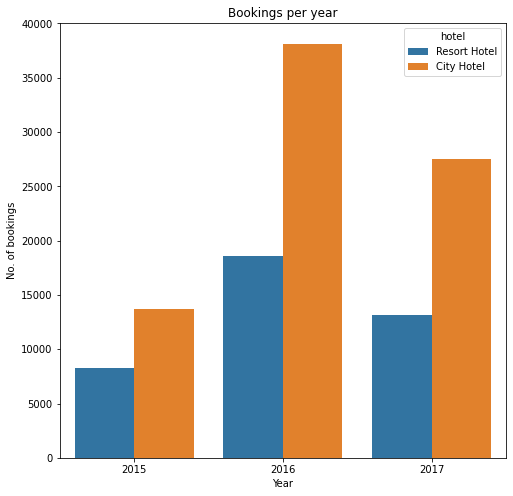

In [43]:
plt.rcParams['figure.figsize']=8,8
sns.countplot(x='arrival_date_year',hue='hotel',data=df)
plt.title('Bookings per year')
plt.xlabel('Year')
plt.ylabel('No. of bookings')



([<matplotlib.patches.Wedge at 0x7f45556866d0>,
 [Text(-1.106570790242581, 0.08718420832874364, '2016'),
  Text(0.8786433276148973, -0.6782963237684696, '2017'),
  Text(0.6071883133383101, 0.9292052260643923, '2015')],
 [Text(-0.6081154793224994, 0.04791204241489515, '47.5%'),
  Text(0.482858044905484, -0.37275743918807785, '34.1%'),
  Text(0.33368006408681905, 0.510644313422774, '18.4%')])

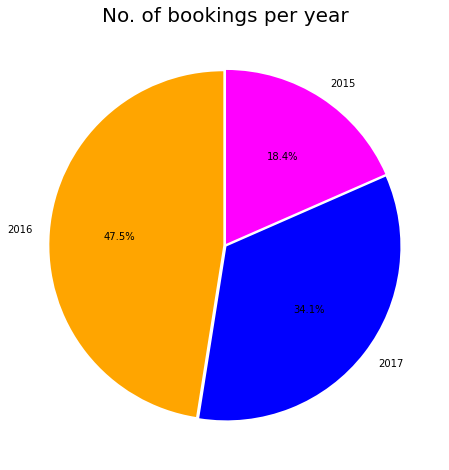

In [92]:
plt.rcParams['figure.figsize']=8,8
labels=df['arrival_date_year'].value_counts().index.tolist()
values=df['arrival_date_year'].value_counts().tolist()
colors=['orange','blue','magenta']
explode=[0.01]*3
plt.title('No. of bookings per year', fontsize=20)

plt.pie(values,labels=labels,explode=explode,colors=colors,autopct='%1.1f%%',startangle=90)

**MONTHWISE BOOKING**

Text(0, 0.5, 'No. of bookings')

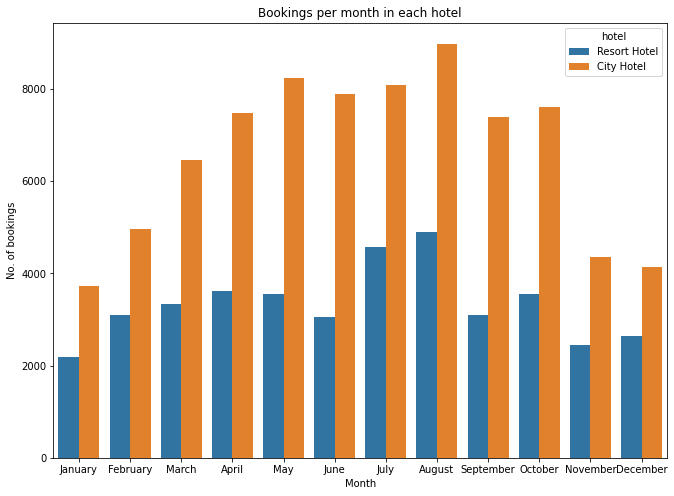

In [44]:
plt.rcParams['figure.figsize']=11,8
sns.countplot(x='arrival_date_month',hue='hotel',data=df,order=['January','February','March','April','May','June','July','August','September','October','November','December'])
sns.color_palette('husl')
plt.title('Bookings per month in each hotel')
plt.xlabel('Month')
plt.ylabel('No. of bookings')

([<matplotlib.patches.Wedge at 0x7f45556f8d10>,
 [Text(-0.39280370645766843, 1.0274751813027496, 'August'),
  Text(-0.9614503021183939, 0.5344280274802672, 'July'),
  Text(-1.0898287789954628, -0.14924219401113958, 'May'),
  Text(-0.8123004490613956, -0.7417330924629526, 'October'),
  Text(-0.26715626457569075, -1.0670649138163826, 'April'),
  Text(0.3609349283846393, -1.0390986370272919, 'June'),
  Text(0.8607463070214311, -0.6849202836454534, 'September'),
  Text(1.089556006617756, -0.15122072755799276, 'March'),
  Text(1.0398938871491505, 0.35863728678126877, 'February'),
  Text(0.8246760399568314, 0.727948781935322, 'November'),
  Text(0.5181103972464813, 0.9703409793804926, 'December'),
  Text(0.17091999748369446, 1.0866399378175706, 'January')],
 [Text(-0.2142565671587282, 0.5604410079833179, '11.6%'),
  Text(-0.5244274375191239, 0.29150619680741846, '10.6%'),
  Text(-0.5944520612702524, -0.08140483309698522, '9.9%'),
  Text(-0.44307297221530667, -0.40458168679797407, '9.3%'),
  

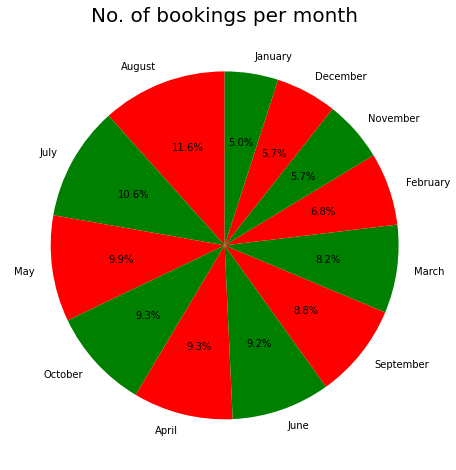

In [91]:
#Piechart for the number of bookings per month
plt.rcParams['figure.figsize']=8,8
labels=df['arrival_date_month'].value_counts().index.tolist()
values=df['arrival_date_month'].value_counts().tolist()
colors=['red','green']
plt.title('No. of bookings per month', fontsize=20)

plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90)


**TYPES OF CUSTOMERS**

Text(0, 0.5, 'No. of customers')

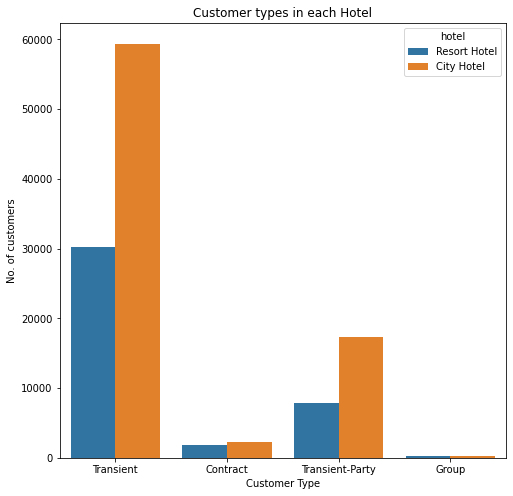

In [46]:
plt.rcParams['figure.figsize']=8,8
sns.countplot(x='customer_type',hue='hotel',data=df)
plt.title('Customer types in each Hotel')
plt.xlabel('Customer Type')
plt.ylabel('No. of customers')

**ADR(AVERAGE DAILY RATE)**





In [47]:
#There are some entries where adr is 0. But ADR is never 0. So we will replace 0 adr with the mean adr.
mean_adr=df['adr'].mean()
df.adr=df.adr.replace(0,mean_adr)
df.adr

0         101.831122
1         101.831122
2          75.000000
3          75.000000
4          98.000000
             ...    
119385     96.140000
119386    225.430000
119387    157.710000
119388    104.400000
119389    151.200000
Name: adr, Length: 119390, dtype: float64

In [48]:
df8=df.groupby(['hotel','arrival_date_month'],as_index=False)['adr'].mean()
df8.columns=['Hotel','Month','Mean ADR']
df8

,Hotel,Month,Mean ADR
0,City Hotel,April,112.259258
1,City Hotel,August,116.052109
2,City Hotel,December,91.882226
3,City Hotel,February,86.934159
4,City Hotel,January,84.400673
5,City Hotel,July,112.106645
6,City Hotel,June,120.080527
7,City Hotel,March,94.046486
8,City Hotel,May,123.011648
9,City Hotel,November,90.196438


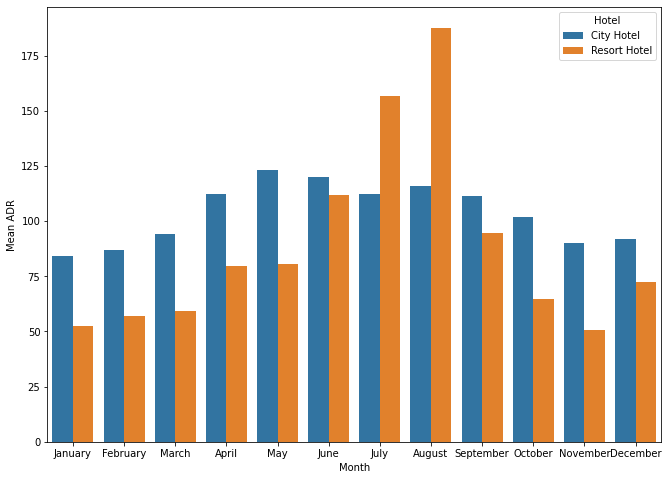

In [81]:
#plot the graph of hotels and their adr
plt.rcParams['figure.figsize']=11,8
sns.barplot(x='Month',y='Mean ADR',hue='Hotel',data=df8,order=['January','February','March','April','May','June','July','August','September','October','November','December'])


In [123]:
#Average ADR for respective months in hotel business
df_month_adr=df.groupby(['arrival_date_month'],as_index=False)['adr'].mean()
df_month_adr.columns=['Month','Avg ADR']
df_month_adr

,Month,Avg ADR
0,April,101.629688
1,August,141.329651
2,December,84.366011
3,February,75.437652
4,January,72.559653
5,July,128.155305
6,June,117.789272
7,March,82.260035
8,May,110.250058
9,November,76.088185


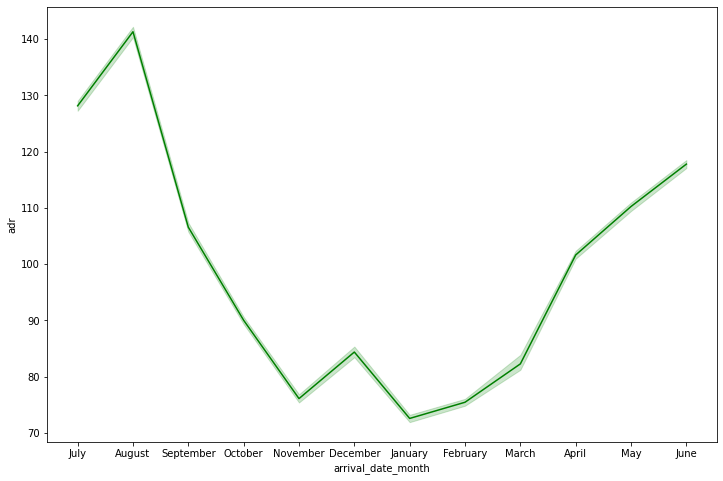

In [129]:
plt.rcParams['figure.figsize']=12,8
sns.lineplot(x='arrival_date_month',y='adr',data=df,color='green')

**NIGHTS SPENT**

In [52]:
df['total nights']=df['stays_in_weekend_nights']+df['stays_in_week_nights']


In [55]:
df_total_nights=df.groupby(['hotel'],as_index=False)['total nights'].mean()
df_total_nights.columns=['Hotel','Average no. of nights']
df_total_nights

,Hotel,Average no. of nights
0,City Hotel,2.978142
1,Resort Hotel,4.318547


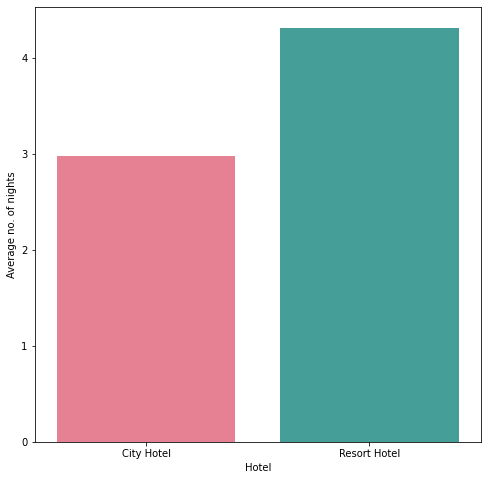

In [61]:
#plot a graph for the average night stays for a hotel
plt.rcParams['figure.figsize']=8,8
sns.barplot(x='Hotel',y='Average no. of nights',data=df_total_nights,palette='husl')

**WAITING TIME**

In [65]:
df_waiting_time=df.groupby(['hotel'],as_index=False)['days_in_waiting_list'].mean()
df_waiting_time.columns=['Hotel','Avg no. of days in waiting list']
df_waiting_time

,Hotel,Avg no. of days in waiting list
0,City Hotel,3.226774
1,Resort Hotel,0.527758


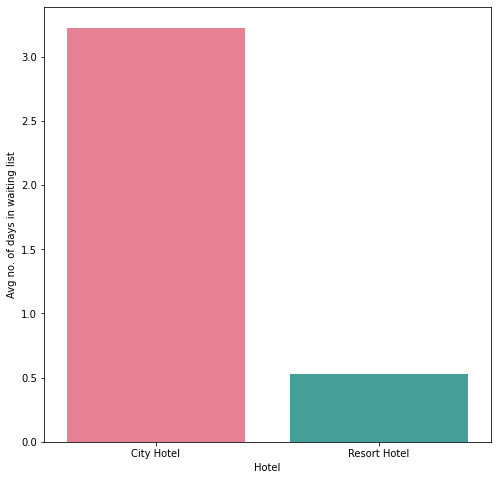

In [67]:
#plot the graph for the average no. of days in waiting list for each hotel
plt.rcParams['figure.figsize']=8,8
sns.barplot(x='Hotel',y='Avg no. of days in waiting list', data=df_waiting_time, palette='husl')

**Distribution channel**

In [70]:
df_distribution_channel=df.groupby(['distribution_channel'],as_index=False)['hotel'].count()
df_distribution_channel.columns=['Distribution channel','No. of bookings']
df_distribution_channel


,Distribution channel,No. of bookings
0,Corporate,6677
1,Direct,14645
2,GDS,193
3,TA/TO,97870
4,Undefined,5


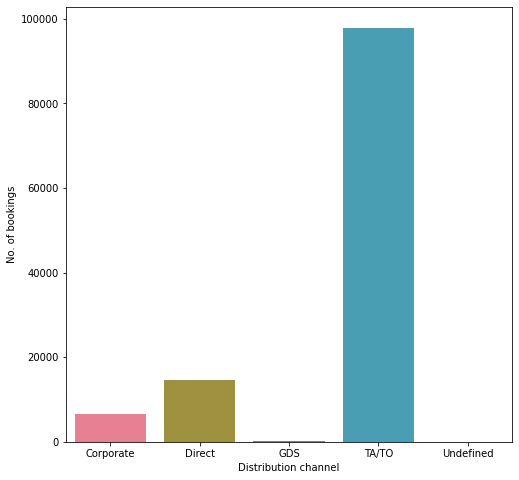

In [74]:
#plotting a graph between distribution channels and number of bookings
plt.rcParams['figure.figsize']=8,8
sns.barplot(x='Distribution channel',y='No. of bookings', data=df_distribution_channel,palette='husl')

In [77]:
df_lead_time=df.groupby(['distribution_channel'],as_index=False)['lead_time'].mean()
df_lead_time.columns=['Distribution channel','Avg. lead time']
df_lead_time

,Distribution channel,Avg. lead time
0,Corporate,44.910289
1,Direct,57.829362
2,GDS,20.715026
3,TA/TO,115.122438
4,Undefined,23.000000


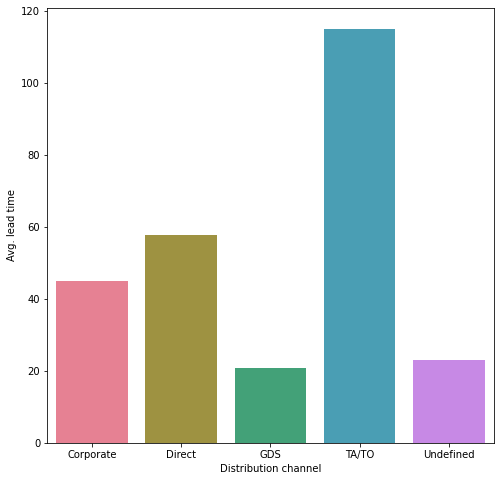

In [93]:
#plotting a graph between distribution channel and average lead time
plt.rcParams['figure.figsize']=8,8
sns.barplot(x='Distribution channel',y='Avg. lead time', data=df_lead_time,palette='husl')

In [96]:
df_dc_adr=df.groupby(['hotel','distribution_channel'],as_index=False)['adr'].mean()
df_dc_adr.columns=['Hotel','Distribution channel','Avg. ADR']
df_dc_adr

,Hotel,Distribution channel,Avg. ADR
0,City Hotel,Corporate,87.915267
1,City Hotel,Direct,118.783687
2,City Hotel,GDS,122.664790
3,City Hotel,TA/TO,106.578487
4,City Hotel,Undefined,29.625000
5,Resort Hotel,Corporate,55.925584
6,Resort Hotel,Direct,106.635055
7,Resort Hotel,TA/TO,98.830472
8,Resort Hotel,Undefined,112.700000


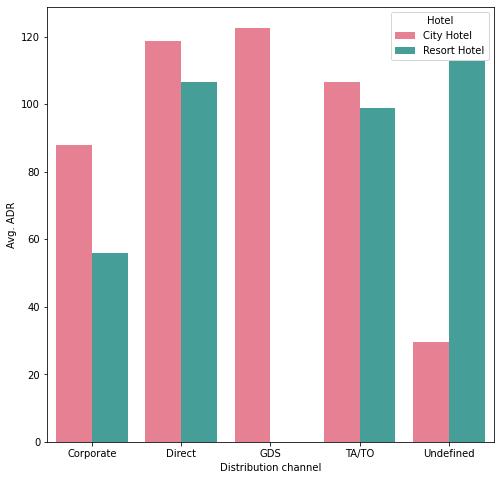

In [97]:

plt.rcParams['figure.figsize']=8,8
sns.barplot(x='Distribution channel',y='Avg. ADR', data=df_dc_adr,palette='husl',hue='Hotel')

In [101]:
#distribution channel cancellation percentage
df_dc_cp=df.groupby(['distribution_channel'],as_index=False).agg({'is_canceled':['sum','count']})
df_dc_cp.columns=['Distribution channel','Cancelled','Total bookings']
df_dc_cp['cancellation%']=(df_dc_cp['Cancelled']/df_dc_cp['Total bookings'])*100
df_dc_cp=df_dc_cp.drop(['Cancelled','Total bookings'],axis=1)
df_dc_cp

,Distribution channel,cancellation%
0,Corporate,22.075783
1,Direct,17.459884
2,GDS,19.170984
3,TA/TO,41.025851
4,Undefined,80.000000


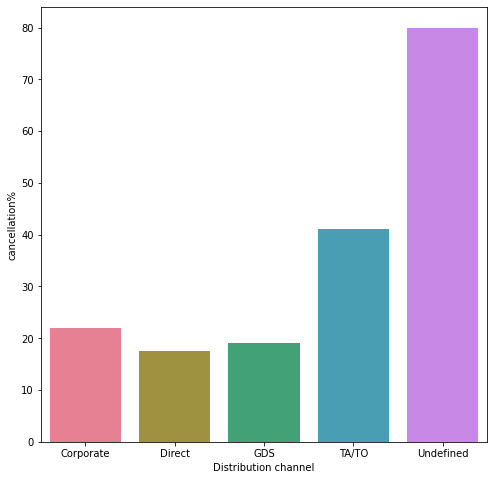

In [103]:
plt.rcParams['figure.figsize']=8,8
sns.barplot(x='Distribution channel',y='cancellation%', data=df_dc_cp,palette='husl')

**TOP10 COUNTRIES**

In [109]:
df_countries=df.groupby(['country'],as_index=False)['hotel'].count()
df_countries=df_countries.sort_values('hotel',ascending=False)
df_countries=df_countries.head(10)
df_countries.columns=['Country','No. of bookings']
df_countries


,Country,No. of bookings
136,PRT,48590
60,GBR,12129
57,FRA,10415
52,ESP,8568
44,DEU,7287
82,ITA,3766
77,IRL,3375
16,BEL,2342
26,BRA,2224
124,NLD,2104


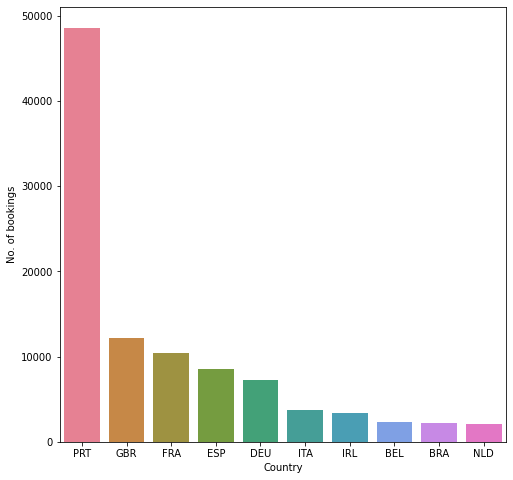

In [110]:
#plot a graph for the countries and no. of bookings made from them
plt.rcParams['figure.figsize']=8,8
sns.barplot(x='Country',y='No. of bookings', data=df_countries,palette='husl')


**FOOD CHOICES**

In [113]:
df_meal=df.groupby(['meal'],as_index=False)['hotel'].count()
df_meal.columns=['Meal choice','No. of bookings']
df_meal

,Meal choice,No. of bookings
0,BB,92310
1,FB,798
2,HB,14463
3,SC,10650
4,Undefined,1169


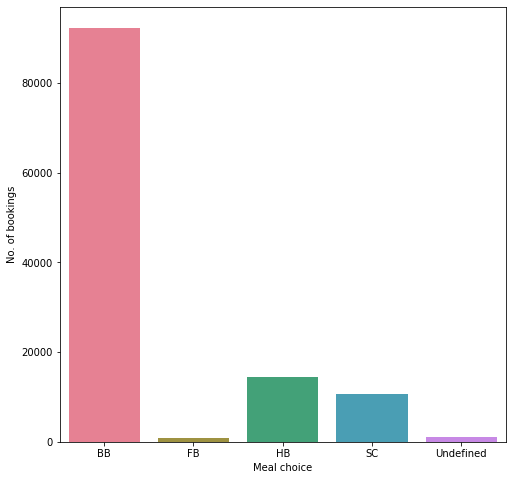

In [114]:
#plot a graph between meal choices and no. of bookings containing those meal choices
plt.rcParams['figure.figsize']=8,8
sns.barplot(x='Meal choice',y='No. of bookings', data=df_meal,palette='husl')